<a target="_blank" href="https://colab.research.google.com/github/masood/2024-pets-privacy-labels-policies/blob/main/dataset.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Accessing Dataset of Apple App Store and Policy (Demo)

In [ ]:
!pip install huggingface-hub

In [ ]:
from huggingface_hub import hf_hub_download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Download Data Files

In [ ]:
REPO_ID = "masoodali/apple-app-store-labels-policies"
FILENAME = "app_store/apps.csv"

In [ ]:
def get_dataframe(FILENAME):
    return pd.read_csv(
        hf_hub_download(repo_id=REPO_ID, filename=FILENAME, repo_type="dataset")
    )

In [ ]:
# App Metadata
app_metadata = get_dataframe(FILENAME="app_store/apps.csv")

# App Store Labels
app_store_labels = get_dataframe(FILENAME="app_store/app_store_labels.csv")

# App to Policy Mapping
app_to_policy = get_dataframe(FILENAME="app_store/app-to-policy.csv")

# Policy Labels
policy_labels = get_dataframe(FILENAME="privacy_policy/policy_labels.csv")

# PrivBERT Classification Results
privbert_results = get_dataframe(FILENAME="privacy_policy/privbert_results.csv")

privbert_results.csv:   0%|          | 0.00/690M [00:00<?, ?B/s]

In [ ]:
app_to_policy

,app_table_id,app_store_id,privacy_policy_url,privacy_policy_index
0,130243682,1023873772,https://www.partnersoftware.com/terms-of-use/,0
1,130243683,1501237924,https://cognify.app/legal/,1
2,130243684,1591780100,https://www.perimeter.com.my/legal/privacy-pol...,2
3,130243685,1327764448,https://goo.gl/fj7faZ,3
4,130243686,1563607064,http://bc.streamers.network/privacy,4
...,...,...,...,...
995727,131483316,1190166334,http://taiwanglassgroup.cn/information_list.ph...,432112
995728,131483317,1604566453,https://fauder.github.io/Emotional-Bond,670144
995729,131483319,313639973,http://start.speedymarks.com/policies/privacyP...,2128
995730,131483320,1569395974,https://mkdosaa.co.uk/,670145


# Total Evaluated Apps

In [ ]:
evaluated_app_ids = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels['app_table_id'].to_list())].loc[app_to_policy['privacy_policy_index'].isin(policy_labels['policy_id'].to_list())]['app_store_id'].to_list()))
total_apps = len(evaluated_app_ids)
total_apps

474669

# Privacy Types

In [ ]:
privacy_type = 'privacy_type_track'
app_store_track = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_track = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

privacy_type = 'privacy_type_linked'
app_store_linked = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_linked = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

privacy_type = 'privacy_type_not_linked'
app_store_not_linked = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_not_linked = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

privacy_type = 'privacy_type_not_collected'
app_store_not_collected = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
policy_not_collected = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))
policy_not_collected = list(set(policy_not_collected) - set(policy_track))
policy_not_collected = list(set(policy_not_collected) - set(policy_linked))
policy_not_collected = list(set(policy_not_collected) - set(policy_not_linked))


In [ ]:
def plot_privacy_types():
    def major_formatter(x, pos):
        label = str(-x) if x < 0 else str(x)
        return label

    labels = ['Data\n Used to\n Track\n You', 'Data\n Linked\n to You', 'Data\n Not\n Linked\n to You', 'Data\n Not\n Collected']

    # Create a figure.
    fig = plt.figure()

    # Set the font size.
    plt.rcParams['font.size'] = '10'

    # Set the figure size.
    fig.set_size_inches(10, 4.1)


    # App Store
    app_store_values = [len(set(app_store_track)-set(policy_track)), len(set(app_store_linked)-set(policy_linked)), len(set(app_store_not_linked)-set(policy_not_linked)), len(set(app_store_not_collected)-set(policy_not_collected))]
    app_store = [x * -100 / total_apps for x in app_store_values]
    app_store_color = ['#F5B7B1', '#FFEF00', '#ABD9E9', '#B8E186']

    polisis_values = [len(set(policy_track)-set(app_store_track)), len(set(policy_linked)-set(app_store_linked)), len(set(policy_not_linked)-set(app_store_not_linked)), len(set(policy_not_collected)-set(app_store_not_collected))]
    polisis = [x * 100 / total_apps for x in polisis_values]
    polisis_color = ['#D7191C', '#FFA62F', '#191970', '#4dac26']

    overlap_values = [len(set(policy_track).intersection(set(app_store_track))), len(set(policy_linked).intersection(set(app_store_linked))), len(set(policy_not_linked).intersection(set(app_store_not_linked))), len(set(policy_not_collected).intersection(set(app_store_not_collected)))]
    overlap = [x * -100 / total_apps for x in overlap_values]
    overlap_color = ['#E66866', '#FFCA18', '#6279AC', '#82C656']

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.14, overall_values[1] * 0.17, overall_values[2] * 0.14, overall_values[3] * 0.23]
    error = [x * 100 / total_apps for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax1 = fig.add_subplot(141)
    ax1.set_ylim([-100, 110])

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    rects1 = ax1.bar(x, app_store, width, bottom=overlap, label='Label Only', color=app_store_color, edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax1.bar(x, overlap, width, label='Both', color=overlap_color, edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax1.bar(x, overlap, width, color=overlap_color,
                    edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax1.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color=polisis_color, edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_xticks(x, labels)

    from matplotlib.patches import Patch
    pa1 = Patch(facecolor='#F5B7B1', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    pa2 = Patch(facecolor='#FFEF00', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    pa3 = Patch(facecolor='#ABD9E9', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    pa4 = Patch(facecolor='#B8E186', edgecolor='black', hatch="\\\\\\", alpha=0.75)
    #
    pb1 = Patch(facecolor='#E66866', edgecolor='black', hatch="xxx", alpha=0.6)
    pb2 = Patch(facecolor='#FFCA18', edgecolor='black', hatch="xxx", alpha=0.6)
    pb3 = Patch(facecolor='#6279AC', edgecolor='black', hatch="xxx", alpha=0.6)
    pb4 = Patch(facecolor='#82C656', edgecolor='black', hatch="xxx", alpha=0.6)
    #
    pc1 = Patch(facecolor='#D7191C', edgecolor='black', hatch="///", alpha=0.75)
    pc2 = Patch(facecolor='#FFA62F', edgecolor='black', hatch="///", alpha=0.75)
    pc3 = Patch(facecolor='#191970', edgecolor='black', hatch="///", alpha=0.75)
    pc4 = Patch(facecolor='#4dac26', edgecolor='black', hatch="///", alpha=0.75)
    ax1.legend(handles=[pa1, pb1, pc1, pa2, pb2, pc2, pa3, pb3, pc3, pa4, pb4, pc4],
            labels=['', '', '', '', '', '', '', '', '', 'Label Only', 'Both', 'Policy Only'],
            ncol=4, handletextpad=0.5, handlelength=1.0, columnspacing=-0.75,
            loc='lower left', fontsize=9)

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax1.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax1.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax1.grid(True, axis='y')
    ax1.set_axisbelow(True)

    # change the fontsize
    ax1.tick_params(axis='x', labelsize=10, pad=0)

    # Set the label text for the first y-axis.
    ax1.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)
    ax1.yaxis.set_label_text('Privacy Policty       Privacy Label', rotation=-90, fontsize=10,   weight='bold')
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.labelpad = 15

    ax1.yaxis.set_major_formatter(major_formatter)


    # Adjust the space between the sub plots.
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.00)

    ax1.axhline(0, linewidth=3, color='black')

    plt.show()


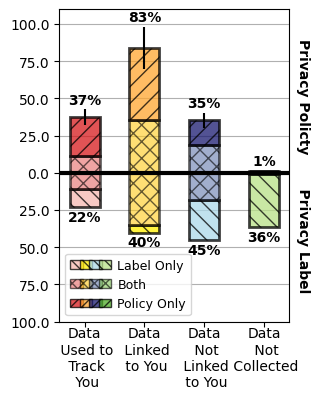

In [ ]:
plot_privacy_types()

# Purposes

In [ ]:
# DATA_LINKED_TO_YOU (YELLOW)
privacy_type = 'privacy_type_linked'
linked_total = len(list(set(policy_linked) | set(app_store_linked)))

purpose = 'purpose_app_functionality'
l_app_store_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_analytics'
l_app_store_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_product_personalization'
l_app_store_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_third_party_advertising'
l_app_store_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_developer_advertising_marketing'
l_app_store_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_other'
l_app_store_purpose_other = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_purpose_other = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))


In [ ]:
# DATA_NOT_LINKED_TO_YOU (BLUE)
privacy_type = 'privacy_type_not_linked'
not_linked_total = len(list(set(policy_not_linked) | set(app_store_not_linked)))

purpose = 'purpose_app_functionality'
nl_app_store_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_app_functionality = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_analytics'
nl_app_store_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_analytics = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_product_personalization'
nl_app_store_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_product_personalization = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_third_party_advertising'
nl_app_store_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_third_party_advertising = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_developer_advertising_marketing'
nl_app_store_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_developer_advertising_marketing = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

purpose = 'purpose_other'
nl_app_store_purpose_other = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[purpose] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_purpose_other = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[purpose] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

In [ ]:
def plot_purposes():
    def hex_to_rgb(value):
        value = value.lstrip('#')
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


    def rgb_to_hex(rgb):
        return '%02x%02x%02x' % rgb


    def mean_color(color1, color2):
        rgb1 = hex_to_rgb(color1)
        rgb2 = hex_to_rgb(color2)

        avg = lambda x, y: round((x+y) / 2)

        new_rgb = ()

        for i in range(len(rgb1)):
            new_rgb += (avg(rgb1[i], rgb2[i]),)

        return '#'+rgb_to_hex(new_rgb)

    def major_formatter(x, pos):
        label = str(-x) if x < 0 else str(x)
        return label

    labels = ['App\n Functio-\n nality', 'Analyt-\n ics', 'Product\n Persona-\n lization', 'Third\n Party\n Advert-\n ising', 'Devel-\n opers\n Advert-\n ising', 'Other\n Purp-\n oses']

    # Create a figure.
    fig = plt.figure()

    # Set the font size.
    plt.rcParams['font.size'] = '9'

    # Set the figure size.
    # fig.set_size_inches(10.5, 6.0)
    fig.set_size_inches(6, 2.75)


    """
    Data Linked to You
    """

    app_store_values = [len(set(l_app_store_purpose_app_functionality)-set(l_policy_purpose_app_functionality)), len(set(l_app_store_purpose_analytics)-set(l_policy_purpose_analytics)), len(set(l_app_store_purpose_product_personalization)-set(l_policy_purpose_product_personalization)), len(set(l_app_store_purpose_third_party_advertising)-set(l_policy_purpose_third_party_advertising)), len(set(l_app_store_purpose_developer_advertising_marketing)-set(l_policy_purpose_developer_advertising_marketing)), len(set(l_app_store_purpose_other)-set(l_policy_purpose_other))]
    app_store = [x * (-100) / linked_total for x in app_store_values]

    polisis_values = [len(set(l_policy_purpose_app_functionality)-set(l_app_store_purpose_app_functionality)), len(set(l_policy_purpose_analytics)-set(l_app_store_purpose_analytics)), len(set(l_policy_purpose_product_personalization)-set(l_app_store_purpose_product_personalization)), len(set(l_policy_purpose_third_party_advertising)-set(l_app_store_purpose_third_party_advertising)), len(set(l_policy_purpose_developer_advertising_marketing)-set(l_app_store_purpose_developer_advertising_marketing)), len(set(l_policy_purpose_other)-set(l_app_store_purpose_other))]
    polisis = [x * (100) / linked_total for x in polisis_values]

    overlap_values = [len(set(l_policy_purpose_app_functionality).intersection(set(l_app_store_purpose_app_functionality))), len(set(l_policy_purpose_analytics).intersection(set(l_app_store_purpose_analytics))), len(set(l_policy_purpose_product_personalization).intersection(set(l_app_store_purpose_product_personalization))), len(set(l_policy_purpose_third_party_advertising).intersection(set(l_app_store_purpose_third_party_advertising))), len(set(l_policy_purpose_developer_advertising_marketing).intersection(set(l_app_store_purpose_developer_advertising_marketing))), len(set(l_policy_purpose_other).intersection(set(l_app_store_purpose_other)))]
    overlap = [x * (-100) / linked_total for x in overlap_values]

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Exclusively Purpose Errors:
    # App Functionality: 1 - (0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.23
    # Analytics: 1 - (0.90 * 0.89) = 0.20
    # Product Personalization: 1 - (0.90 * 0.86) = 0.23
    # Third-party Advertising: 1 - (0.92 * 0.94) = 0.14
    # Developers Advertising: 1 - (0.89 * 0.94) = 0.16
    # Other Purposes: 1 - (0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.21

    # Purpose + Data Linked to You (i.e., Identifiable only):
    # App Functionality: 1 - (0.92 * 0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.29
    # Analytics: 1 - (0.92 * 0.90 * 0.89) = 0.26
    # Product Personalization: 1 - (0.92 * 0.90 * 0.86) = 0.29
    # Third-party Advertising: 1 - (0.92 * 0.92 * 0.94) = 0.20
    # Developers Advertising: 1 - (0.92 * 0.89 * 0.94) = 0.23
    # Other Purposes: 1 - (0.92 * 0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.27

    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.29, overall_values[1] * 0.26, overall_values[2] * 0.29, overall_values[3] * 0.20, overall_values[4] * 0.23, overall_values[5] * 0.27]
    # Percentage of Overall Error:
    error = [x * 100 / linked_total for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax2 = fig.add_subplot(121)
    ax2.set_ylim([-145, 145])
    ax2.set_title('Data Linked\n to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    # DATA LINKED TO YOU: App Store = '#FFEF00'
    # DATA LINKED TO YOU: Polisis = '#FFA62F'
    # DATA LINKED TO YOU: Overlap = mean_color('#FFEF00','#FFA62F') = '#FFCA18'
    rects1 = ax2.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#FFEF00', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax2.bar(x, overlap, width, label='Both', color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax2.bar(x, overlap, width, color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black',
                    linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax2.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#FFA62F', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_xticks(x, labels, fontsize=9)

    # Set the rotation for the xaxis
    ax2.set_xticklabels(ax2.get_xticklabels(), ha='center')

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax2.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax2.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')


    # (handles, labels) = (ax2.get_legend_handles_labels())
    # ax2.legend(handles[::-1], labels[::-1], loc='lower right')

    ax2.legend(ax2.get_legend_handles_labels()[0][::-1], ax2.get_legend_handles_labels()[1][::-1], loc='lower right', prop={'size': 7})

    # Show the grid lines.
    ax2.grid(True, axis='y')
    ax2.set_axisbelow(True)

    # change the fontsize
    ax2.tick_params(axis='x', labelsize=9, pad=0)

    ax2.yaxis.set_major_formatter(major_formatter)

    # Set the label text for the first y-axis.
    ax2.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)

    # Remove little ticks on y-axis.
    # for tick in ax2.yaxis.get_major_ticks():
    #     tick.tick1line.set_visible(False)
    #     tick.tick2line.set_visible(False)
    #     tick.label1.set_visible(False)
    #     tick.label2.set_visible(False)


    """
    Data Not Linked to You
    """


    app_store_values = [len(set(nl_app_store_purpose_app_functionality)-set(nl_policy_purpose_app_functionality)), len(set(nl_app_store_purpose_analytics)-set(nl_policy_purpose_analytics)), len(set(nl_app_store_purpose_product_personalization)-set(nl_policy_purpose_product_personalization)), len(set(nl_app_store_purpose_third_party_advertising)-set(nl_policy_purpose_third_party_advertising)), len(set(nl_app_store_purpose_developer_advertising_marketing)-set(nl_policy_purpose_developer_advertising_marketing)), len(set(nl_app_store_purpose_other)-set(nl_policy_purpose_other))]
    app_store = [x * (-100) / not_linked_total for x in app_store_values]

    polisis_values = [len(set(nl_policy_purpose_app_functionality)-set(nl_app_store_purpose_app_functionality)), len(set(nl_policy_purpose_analytics)-set(nl_app_store_purpose_analytics)), len(set(nl_policy_purpose_product_personalization)-set(nl_app_store_purpose_product_personalization)), len(set(nl_policy_purpose_third_party_advertising)-set(nl_app_store_purpose_third_party_advertising)), len(set(nl_policy_purpose_developer_advertising_marketing)-set(nl_app_store_purpose_developer_advertising_marketing)), len(set(nl_policy_purpose_other)-set(nl_app_store_purpose_other))]
    polisis = [x * (100) / not_linked_total for x in polisis_values]

    overlap_values = [len(set(nl_policy_purpose_app_functionality).intersection(set(nl_app_store_purpose_app_functionality))), len(set(nl_policy_purpose_analytics).intersection(set(nl_app_store_purpose_analytics))), len(set(nl_policy_purpose_product_personalization).intersection(set(nl_app_store_purpose_product_personalization))), len(set(nl_policy_purpose_third_party_advertising).intersection(set(nl_app_store_purpose_third_party_advertising))), len(set(nl_policy_purpose_developer_advertising_marketing).intersection(set(nl_app_store_purpose_developer_advertising_marketing))), len(set(nl_policy_purpose_other).intersection(set(nl_app_store_purpose_other)))]
    overlap = [x * (-100) / not_linked_total for x in overlap_values]


    # Exclusively Purpose Errors:
    # App Functionality: 1 - (0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.23
    # Analytics: 1 - (0.90 * 0.89) = 0.20
    # Product Personalization: 1 - (0.90 * 0.86) = 0.23
    # Third-party Advertising: 1 - (0.92 * 0.94) = 0.14
    # Developers Advertising: 1 - (0.89 * 0.94) = 0.16
    # Other Purposes: 1 - (0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.21

    # Purpose + Data Not Linked to You (i.e., Aggregated/Anonymized only):
    # App Functionality: 1 - (0.96 * 0.90 * ((0.84 + 0.84 + 0.9) / 3)) = 0.26
    # Analytics: 1 - (0.96 * 0.90 * 0.89) = 0.23
    # Product Personalization: 1 - (0.96 * 00.90 * 0.86) = 0.26
    # Third-party Advertising: 1 - (0.96 * 0.92 * 0.94) = 0.17
    # Developers Advertising: 1 - (0.96 * 0.89 * 0.94) = 0.20
    # Other Purposes: 1 - (0.96 * 0.90 * ((0.97 + 0.89 + 0.78) / 3)) = 0.24

    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.26, overall_values[1] * 0.23, overall_values[2] * 0.26, overall_values[3] * 0.17, overall_values[4] * 0.20, overall_values[5] * 0.24]
    # Percentage of Overall Error:
    error = [x * 100 / not_linked_total for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax3 = fig.add_subplot(122)
    ax3.set_ylim([-145, 145])
    ax3.set_title('Data Not\n Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    # DATA NOT LINKED TO YOU: App Store = '#ABD9E9'
    # DATA NOT LINKED TO YOU: Polisis = '#191970'
    # DATA NOT LINKED TO YOU: Overlap = mean_color('#ABD9E9','#191970') = '#6279AC'
    rects1 = ax3.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#ABD9E9', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax3.bar(x, overlap, width, label='Both', color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax3.bar(x, overlap, width, color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax3.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#191970', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_xticks(x, labels)

    # Set the rotation for the xaxis
    ax3.set_xticklabels(ax3.get_xticklabels(), ha='center')

    ax3.legend(ax3.get_legend_handles_labels()[0][::-1], ax3.get_legend_handles_labels()[1][::-1], loc='lower right', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax3.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax3.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax3.grid(True, axis='y')
    ax3.set_axisbelow(True)

    # change the fontsize
    ax3.tick_params(axis='x', labelsize=9, pad=0)

    # Remove little ticks on y-axis.
    for tick in ax3.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    # Set the label text for the first y-axis.
    ax3.yaxis.set_label_text('Privacy Policy$\quad\quad$Privacy Label', rotation=-90, fontsize=8)
    ax3.yaxis.set_label_position("right")
    ax3.yaxis.labelpad = 15


    # Adjust the space between the sub plots.
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.03)

    # ax1.axhline(0, linewidth=3, color='black')
    ax2.axhline(0, linewidth=3, color='black')
    ax3.axhline(0, linewidth=3, color='black')
    # ax4.axhline(0, linewidth=3, color='black')

    # Adjust the space between the sub plots.
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05)

    # Show/Save the figure.
    plt.show()

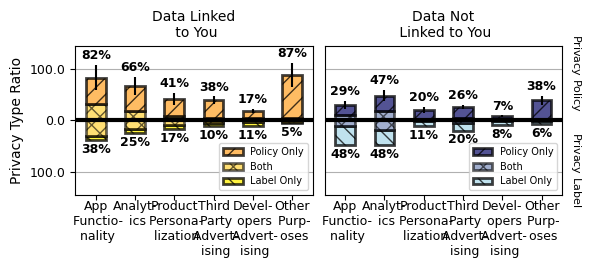

In [ ]:
plot_purposes()

# Data Categories

In [ ]:
# DATA_USED_TO_TRACK_YOU (RED)
privacy_type = 'privacy_type_track'
track_total = len(list(set(policy_track) | set(app_store_track)))

data_category = 'data_category_browsing_history'
t_app_store_data_category_browsing_history = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_browsing_history = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_contact_info'
t_app_store_data_category_contact_info = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_contact_info = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_financial_info'
t_app_store_data_category_financial_info = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_financial_info = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_health_fitness'
t_app_store_data_category_health_fitness = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_health_fitness = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_identifiers'
t_app_store_data_category_identifiers = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_identifiers = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_location'
t_app_store_data_category_location = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_location = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_usage_data'
t_app_store_data_category_usage_data = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_usage_data = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_user_content'
t_app_store_data_category_user_content = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_user_content = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_diagnostics'
t_app_store_data_category_diagnostics = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_diagnostics = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_contacts'
t_app_store_data_category_contacts = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_contacts = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_purchases'
t_app_store_data_category_purchases = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_purchases = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_search_history'
t_app_store_data_category_search_history = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_search_history = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_sensitive'
t_app_store_data_category_sensitive = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
t_policy_data_category_sensitive = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

In [ ]:
# DATA_LINKED_TO_YOU (YELLOW)
privacy_type = 'privacy_type_linked'
linked_total = len(list(set(policy_linked) | set(app_store_linked)))

data_category = 'data_category_browsing_history'
l_app_store_data_category_browsing_history = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_browsing_history = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_contact_info'
l_app_store_data_category_contact_info = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_contact_info = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_financial_info'
l_app_store_data_category_financial_info = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_financial_info = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_health_fitness'
l_app_store_data_category_health_fitness = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_health_fitness = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_identifiers'
l_app_store_data_category_identifiers = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_identifiers = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_location'
l_app_store_data_category_location = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_location = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_usage_data'
l_app_store_data_category_usage_data = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_usage_data = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_user_content'
l_app_store_data_category_user_content = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_user_content = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_diagnostics'
l_app_store_data_category_diagnostics = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_diagnostics = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_contacts'
l_app_store_data_category_contacts = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_contacts = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_purchases'
l_app_store_data_category_purchases = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_purchases = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_search_history'
l_app_store_data_category_search_history = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_search_history = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_sensitive'
l_app_store_data_category_sensitive = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
l_policy_data_category_sensitive = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))


In [ ]:
# DATA_NOT_LINKED_TO_YOU (BLUE)
privacy_type = 'privacy_type_not_linked'
not_linked_total = len(list(set(policy_not_linked) | set(app_store_not_linked)))

data_category = 'data_category_browsing_history'
nl_app_store_data_category_browsing_history = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_browsing_history = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_contact_info'
nl_app_store_data_category_contact_info = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_contact_info = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_financial_info'
nl_app_store_data_category_financial_info = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_financial_info = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_health_fitness'
nl_app_store_data_category_health_fitness = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_health_fitness = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_identifiers'
nl_app_store_data_category_identifiers = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_identifiers = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_location'
nl_app_store_data_category_location = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_location = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_usage_data'
nl_app_store_data_category_usage_data = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_usage_data = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_user_content'
nl_app_store_data_category_user_content = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_user_content = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_diagnostics'
nl_app_store_data_category_diagnostics = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_diagnostics = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_contacts'
nl_app_store_data_category_contacts = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_contacts = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_purchases'
nl_app_store_data_category_purchases = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_purchases = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_search_history'
nl_app_store_data_category_search_history = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_search_history = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

data_category = 'data_category_sensitive'
nl_app_store_data_category_sensitive = list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1].loc[app_store_labels[data_category] == 1]['app_table_id'].to_list())]['app_store_id'].to_list()))
nl_policy_data_category_sensitive = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1].loc[policy_labels[data_category] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

In [ ]:
def plot_data_categories():
    def hex_to_rgb(value):
        value = value.lstrip('#')
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


    def rgb_to_hex(rgb):
        return '%02x%02x%02x' % rgb


    def mean_color(color1, color2):
        rgb1 = hex_to_rgb(color1)
        rgb2 = hex_to_rgb(color2)

        avg = lambda x, y: round((x+y) / 2)

        new_rgb = ()

        for i in range(len(rgb1)):
            new_rgb += (avg(rgb1[i], rgb2[i]),)

        return '#'+rgb_to_hex(new_rgb)

    def major_formatter(x, pos):
        label = str(-x) if x < 0 else str(x)
        return label

    labels = ['Brows-\n ing\n History', 'Contact\n Info', 'Finan-\n cial\n Info', 'Health\n \&\n Fitness', 'Identi-\n fiers', 'Location', 'Usage\n Data', 'User\n Content', 'Diagno-\n stics','Cont-\n acts', 'Purch-\n ases', 'Search\n History', 'Sensitive\n Info']


    # Create a figure.
    fig = plt.figure()

    # Set the font size.
    plt.rcParams['font.size'] = '9'

    # Set the figure size.
    # fig.set_size_inches(10.5, 6.0)
    fig.set_size_inches(7, 6.5)


    """
    Data Used to Track You
    """


    app_store_values = [len(set(t_app_store_data_category_browsing_history)-set(t_policy_data_category_browsing_history)), len(set(t_app_store_data_category_contact_info)-set(t_policy_data_category_contact_info)), len(set(t_app_store_data_category_financial_info)-set(t_policy_data_category_financial_info)), len(set(t_app_store_data_category_health_fitness)-set(t_policy_data_category_health_fitness)), len(set(t_app_store_data_category_identifiers)-set(t_policy_data_category_identifiers)), len(set(t_app_store_data_category_location)-set(t_policy_data_category_location)), len(set(t_app_store_data_category_usage_data)-set(t_policy_data_category_usage_data)), len(set(t_app_store_data_category_user_content)-set(t_policy_data_category_user_content)), len(set(t_app_store_data_category_diagnostics)-set(t_policy_data_category_diagnostics)), len(set(t_app_store_data_category_contacts)-set(t_policy_data_category_contacts)), len(set(t_app_store_data_category_purchases)-set(t_policy_data_category_purchases)), len(set(t_app_store_data_category_search_history)-set(t_policy_data_category_search_history)), len(set(t_app_store_data_category_sensitive)-set(t_policy_data_category_sensitive))]
    app_store = [x * (-100) / track_total for x in app_store_values]

    polisis_values = [len(set(t_policy_data_category_browsing_history)-set(t_app_store_data_category_browsing_history)), len(set(t_policy_data_category_contact_info)-set(t_app_store_data_category_contact_info)), len(set(t_policy_data_category_financial_info)-set(t_app_store_data_category_financial_info)), len(set(t_policy_data_category_health_fitness)-set(t_app_store_data_category_health_fitness)), len(set(t_policy_data_category_identifiers)-set(t_app_store_data_category_identifiers)), len(set(t_policy_data_category_location)-set(t_app_store_data_category_location)), len(set(t_policy_data_category_usage_data)-set(t_app_store_data_category_usage_data)), len(set(t_policy_data_category_user_content)-set(t_app_store_data_category_user_content)), len(set(t_policy_data_category_diagnostics)-set(t_app_store_data_category_diagnostics)), len(set(t_policy_data_category_contacts)-set(t_app_store_data_category_contacts)), len(set(t_policy_data_category_purchases)-set(t_app_store_data_category_purchases)), len(set(t_policy_data_category_search_history)-set(t_app_store_data_category_search_history)), len(set(t_policy_data_category_sensitive)-set(t_app_store_data_category_sensitive))]
    polisis = [x * (100) / track_total for x in polisis_values]

    overlap_values = [len(set(t_policy_data_category_browsing_history).intersection(set(t_app_store_data_category_browsing_history))), len(set(t_policy_data_category_contact_info).intersection(set(t_app_store_data_category_contact_info))), len(set(t_policy_data_category_financial_info).intersection(set(t_app_store_data_category_financial_info))), len(set(t_policy_data_category_health_fitness).intersection(set(t_app_store_data_category_health_fitness))), len(set(t_policy_data_category_identifiers).intersection(set(t_app_store_data_category_identifiers))), len(set(t_policy_data_category_location).intersection(set(t_app_store_data_category_location))), len(set(t_policy_data_category_usage_data).intersection(set(t_app_store_data_category_usage_data))), len(set(t_policy_data_category_user_content).intersection(set(t_app_store_data_category_user_content))), len(set(t_policy_data_category_diagnostics).intersection(set(t_app_store_data_category_diagnostics))), len(set(t_policy_data_category_contacts).intersection(set(t_app_store_data_category_contacts))), len(set(t_policy_data_category_purchases).intersection(set(t_app_store_data_category_purchases))), len(set(t_policy_data_category_search_history).intersection(set(t_app_store_data_category_search_history))), len(set(t_policy_data_category_sensitive).intersection(set(t_app_store_data_category_sensitive)))]
    overlap = [x * (-100) / track_total for x in overlap_values]

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Exclusively Data Category Errors:
    # Browsing History: 1 - (0.92 * 0.81) = 0.25
    # Contact Info: 1 - (0.90 * 0.92) = 0.17
    # Financial Info: 1 - (0.90 * 0.81) = 0.27
    # Health & Fitness: 1 - (0.90 * 0.93) = 0.16
    # Identifiers: 1 - (0.90 * ((0.98 + 0.89) / 2)) = 0.16
    # Location: 1 - (0.90 * 0.89) = 0.20
    # Usage Data: 1 - (0.90 * 0.81) = 0.27
    # User Content: 1 - (0.90 * ((0.75 + 0.67) / 2)) = 0.36
    # Diagnostics: 1 - (0.90 * ((0.91 + 0.89) / 2)) = 0.19
    # Contacts: 1 - (0.90 * 0.75) = 0.33
    # Purchases: 1 - (0.90 * ((0.81 + 0.81) / 2)) = 0.33
    # Search History: 1 - (0.89 * 0.81) = 0.28
    # Sensitive Info: 1 - (0.90 * 0.92) = 0.17

    # Data Category + Data Used to Track You (i.e., Advertising only; Except Search History ==> Also add Third-party Sharing/Collection):
    # Browsing History: 1 - (0.92 * 0.81) = 0.25
    # Contact Info: 1 - (0.90 * 0.92) = 0.17
    # Financial Info: 1 - (0.90 * 0.81) = 0.27
    # Health & Fitness: 1 - (0.90 * 0.93) = 0.16
    # Identifiers: 1 - (0.90 * ((0.98 + 0.89) / 2)) = 0.16
    # Location: 1 - (0.90 * 0.89) = 0.20
    # Usage Data: 1 - (0.90 * 0.81) = 0.27
    # User Content: 1 - (0.90 * ((0.75 + 0.67) / 2)) = 0.36
    # Diagnostics: 1 - (0.90 * ((0.91 + 0.89) / 2)) = 0.19
    # Contacts: 1 - (0.90 * 0.75) = 0.33
    # Purchases: 1 - (0.90 * ((0.81 + 0.81) / 2)) = 0.33
    # Search History: 1 - (0.89 * 0.81) = 0.28
    # Sensitive Info: 1 - (0.90 * 0.92) = 0.17

    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.25, overall_values[1] * 0.17, overall_values[2] * 0.27, overall_values[3] * 0.16, overall_values[4] * 0.16, overall_values[5] * 0.20, overall_values[6] * 0.27, overall_values[7] * 0.3619, overall_values[8] * 0.19, overall_values[9] * 0.33, overall_values[10] * 0.33, overall_values[11] * 0.28, overall_values[12] * 0.17]
    # Percentage of Overall Error:
    error = [x * 100 / 232648 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax1 = fig.add_subplot(311)
    ax1.set_ylim([-120, 120])
    ax1.set_title('Data Used to Track You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    # DATA USED TO TRACK YOU: App Store = '#F5B7B1'
    # DATA USED TO TRACK YOU: Polisis = '#D7191C'
    # DATA USED TO TRACK YOU: Overlap = mean_color('#F5B7B1','#D7191C') = '#E66866'
    rects1 = ax1.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#F5B7B1', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax1.bar(x, overlap, width, label='Both', color=mean_color('#F5B7B1','#D7191C'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax1.bar(x, overlap, width, color=mean_color('#F5B7B1','#D7191C'),
                    edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax1.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#D7191C', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_xticks(x, labels)

    ax1.legend(ax1.get_legend_handles_labels()[0][::-1], ax1.get_legend_handles_labels()[1][::-1], loc='lower right', prop={'size': 7})
    # ax1.legend(loc='lower right', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax1.bar_label(rects4, labels=['%.2g%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax1.bar_label(rects1, labels=['%.2g%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax1.grid(True, axis='y')
    ax1.set_axisbelow(True)

    # change the fontsize
    ax1.tick_params(axis='x', labelsize=9, pad=0)

    # Set the label text for the first y-axis.
    ax1.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)

    ax1.yaxis.set_major_formatter(major_formatter)

    ax_twin = ax1.twinx()
    ax_twin.yaxis.set_label_text('Privacy Policy$\quad\quad$Privacy Label', rotation=-90, fontsize=8)
    ax_twin.yaxis.set_label_position("right")
    ax_twin.yaxis.labelpad = 15

    # Remove little ticks on y-axis.
    for tick in ax_twin.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    # """
    # Data Linked to You
    # """


    """
    Data Linked to You
    """

    app_store_values = [len(set(l_app_store_data_category_browsing_history)-set(l_policy_data_category_browsing_history)), len(set(l_app_store_data_category_contact_info)-set(l_policy_data_category_contact_info)), len(set(l_app_store_data_category_financial_info)-set(l_policy_data_category_financial_info)), len(set(l_app_store_data_category_health_fitness)-set(l_policy_data_category_health_fitness)), len(set(l_app_store_data_category_identifiers)-set(l_policy_data_category_identifiers)), len(set(l_app_store_data_category_location)-set(l_policy_data_category_location)), len(set(l_app_store_data_category_usage_data)-set(l_policy_data_category_usage_data)), len(set(l_app_store_data_category_user_content)-set(l_policy_data_category_user_content)), len(set(l_app_store_data_category_diagnostics)-set(l_policy_data_category_diagnostics)), len(set(l_app_store_data_category_contacts)-set(l_policy_data_category_contacts)), len(set(l_app_store_data_category_purchases)-set(l_policy_data_category_purchases)), len(set(l_app_store_data_category_search_history)-set(l_policy_data_category_search_history)), len(set(l_app_store_data_category_sensitive)-set(l_policy_data_category_sensitive))]
    app_store = [x * (-100) / linked_total for x in app_store_values]

    polisis_values = [len(set(l_policy_data_category_browsing_history)-set(l_app_store_data_category_browsing_history)), len(set(l_policy_data_category_contact_info)-set(l_app_store_data_category_contact_info)), len(set(l_policy_data_category_financial_info)-set(l_app_store_data_category_financial_info)), len(set(l_policy_data_category_health_fitness)-set(l_app_store_data_category_health_fitness)), len(set(l_policy_data_category_identifiers)-set(l_app_store_data_category_identifiers)), len(set(l_policy_data_category_location)-set(l_app_store_data_category_location)), len(set(l_policy_data_category_usage_data)-set(l_app_store_data_category_usage_data)), len(set(l_policy_data_category_user_content)-set(l_app_store_data_category_user_content)), len(set(l_policy_data_category_diagnostics)-set(l_app_store_data_category_diagnostics)), len(set(l_policy_data_category_contacts)-set(l_app_store_data_category_contacts)), len(set(l_policy_data_category_purchases)-set(l_app_store_data_category_purchases)), len(set(l_policy_data_category_search_history)-set(l_app_store_data_category_search_history)), len(set(l_policy_data_category_sensitive)-set(l_app_store_data_category_sensitive))]
    polisis = [x * (100) / linked_total for x in polisis_values]

    overlap_values = [len(set(l_policy_data_category_browsing_history).intersection(set(l_app_store_data_category_browsing_history))), len(set(l_policy_data_category_contact_info).intersection(set(l_app_store_data_category_contact_info))), len(set(l_policy_data_category_financial_info).intersection(set(l_app_store_data_category_financial_info))), len(set(l_policy_data_category_health_fitness).intersection(set(l_app_store_data_category_health_fitness))), len(set(l_policy_data_category_identifiers).intersection(set(l_app_store_data_category_identifiers))), len(set(l_policy_data_category_location).intersection(set(l_app_store_data_category_location))), len(set(l_policy_data_category_usage_data).intersection(set(l_app_store_data_category_usage_data))), len(set(l_policy_data_category_user_content).intersection(set(l_app_store_data_category_user_content))), len(set(l_policy_data_category_diagnostics).intersection(set(l_app_store_data_category_diagnostics))), len(set(l_policy_data_category_contacts).intersection(set(l_app_store_data_category_contacts))), len(set(l_policy_data_category_purchases).intersection(set(l_app_store_data_category_purchases))), len(set(l_policy_data_category_search_history).intersection(set(l_app_store_data_category_search_history))), len(set(l_policy_data_category_sensitive).intersection(set(l_app_store_data_category_sensitive)))]
    overlap = [x * (-100) / linked_total for x in overlap_values]

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))


    # Exclusively Data Category Errors:
    # Browsing History: 1 - (0.92 * 0.81) = 0.25
    # Contact Info: 1 - (0.90 * 0.92) = 0.17
    # Financial Info: 1 - (0.90 * 0.81) = 0.27
    # Health & Fitness: 1 - (0.90 * 0.93) = 0.16
    # Identifiers: 1 - (0.90 * ((0.98 + 0.89) / 2)) = 0.16
    # Location: 1 - (0.90 * 0.89) = 0.20
    # Usage Data: 1 - (0.90 * 0.81) = 0.27
    # User Content: 1 - (0.90 * ((0.75 + 0.67) / 2)) = 0.36
    # Diagnostics: 1 - (0.90 * ((0.91 + 0.89) / 2)) = 0.19
    # Contacts: 1 - (0.90 * 0.75) = 0.33
    # Purchases: 1 - (0.90 * ((0.81 + 0.81) / 2)) = 0.33
    # Search History: 1 - (0.89 * 0.81) = 0.28
    # Sensitive Info: 1 - (0.90 * 0.92) = 0.17

    # Data Category + Data Linked to You (i.e., Identifiable only):
    # Browsing History: 1 - (0.92 * 0.92 * 0.81) = 0.31
    # Contact Info: 1 - (0.92 * 0.90 * 0.92) = 0.24
    # Financial Info: 1 - (0.92 * 0.90 * 0.81) = 0.33
    # Health & Fitness: 1 - (0.92 * 0.90 * 0.93) = 0.23
    # Identifiers: 1 - (0.92 * 0.90 * ((0.98 + 0.89) / 2)) = 0.23
    # Location: 1 - (0.92 * 0.90 * 0.89) = 0.26
    # Usage Data: 1 - (0.92 * 0.90 * 0.81) = 0.33
    # User Content: 1 - (0.92 * 0.90 * ((0.75 + 0.67) / 2)) = 0.41
    # Diagnostics: 1 - (0.92 * 0.90 * ((0.91 + 0.89) / 2)) = 0.25
    # Contacts: 1 - (0.92 * 0.90 * 0.75) = 0.38
    # Purchases: 1 - (0.92 * 0.90 * ((0.81 + 0.81) / 2)) = 0.33
    # Search History: 1 - (0.92 * 0.89 * 0.81) = 0.34
    # Sensitive Info: 1 - (0.92 * 0.90 * 0.92) = 0.24

    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.31, overall_values[1] * 0.24, overall_values[2] * 0.33, overall_values[3] * 0.23, overall_values[4] * 0.23, overall_values[5] * 0.26, overall_values[6] * 0.33, overall_values[7] * 0.41, overall_values[8] * 0.25, overall_values[9] * 0.38, overall_values[10] * 0.33, overall_values[11] * 0.34, overall_values[12] * 0.24]
    # Percentage of Overall Error:
    error = [x * 100 / 419504 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax2 = fig.add_subplot(312)
    ax2.set_ylim([-120, 120])
    ax2.set_title('Data Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    # DATA LINKED TO YOU: App Store = '#FFEF00'
    # DATA LINKED TO YOU: Polisis = '#FFA62F'
    # DATA LINKED TO YOU: Overlap = mean_color('#FFEF00','#FFA62F') = '#FFCA18'
    rects1 = ax2.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#FFEF00', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax2.bar(x, overlap, width, label='Both', color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax2.bar(x, overlap, width, color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black',
                    linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax2.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#FFA62F', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_xticks(x, labels)

    ax2.legend(ax2.get_legend_handles_labels()[0][::-1], ax2.get_legend_handles_labels()[1][::-1], loc='lower right', prop={'size': 7})
    # ax2.legend(loc='lower right', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax2.bar_label(rects4, labels=['%.2g%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax2.bar_label(rects1, labels=['%.2g%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')


    # Show the grid lines.
    ax2.grid(True, axis='y')
    ax2.set_axisbelow(True)

    # change the fontsize
    ax2.tick_params(axis='x', labelsize=9, pad=0)

    # Remove little ticks on y-axis.
    # for tick in ax2.yaxis.get_major_ticks():
    #     tick.tick1line.set_visible(False)
    #     tick.tick2line.set_visible(False)
    #     tick.label1.set_visible(False)
    #     tick.label2.set_visible(False)

    ax2.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)

    ax2.yaxis.set_major_formatter(major_formatter)

    ax_twin = ax2.twinx()
    # ax_twin.set_yticks()
    ax_twin.yaxis.set_label_text('Privacy Policy$\quad\quad$Privacy Label', rotation=-90, fontsize=8)
    ax_twin.yaxis.set_label_position("right")
    ax_twin.yaxis.labelpad = 15

    # Remove little ticks on y-axis.
    for tick in ax_twin.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

    # """
    # Data Not Linked to You
    # """

    app_store_values = [len(set(nl_app_store_data_category_browsing_history)-set(nl_policy_data_category_browsing_history)), len(set(nl_app_store_data_category_contact_info)-set(nl_policy_data_category_contact_info)), len(set(nl_app_store_data_category_financial_info)-set(nl_policy_data_category_financial_info)), len(set(nl_app_store_data_category_health_fitness)-set(nl_policy_data_category_health_fitness)), len(set(nl_app_store_data_category_identifiers)-set(nl_policy_data_category_identifiers)), len(set(nl_app_store_data_category_location)-set(nl_policy_data_category_location)), len(set(nl_app_store_data_category_usage_data)-set(nl_policy_data_category_usage_data)), len(set(nl_app_store_data_category_user_content)-set(nl_policy_data_category_user_content)), len(set(nl_app_store_data_category_diagnostics)-set(nl_policy_data_category_diagnostics)), len(set(nl_app_store_data_category_contacts)-set(nl_policy_data_category_contacts)), len(set(nl_app_store_data_category_purchases)-set(nl_policy_data_category_purchases)), len(set(nl_app_store_data_category_search_history)-set(nl_policy_data_category_search_history)), len(set(nl_app_store_data_category_sensitive)-set(nl_policy_data_category_sensitive))]
    app_store = [x * (-100) / not_linked_total for x in app_store_values]

    polisis_values = [len(set(nl_policy_data_category_browsing_history)-set(nl_app_store_data_category_browsing_history)), len(set(nl_policy_data_category_contact_info)-set(nl_app_store_data_category_contact_info)), len(set(nl_policy_data_category_financial_info)-set(nl_app_store_data_category_financial_info)), len(set(nl_policy_data_category_health_fitness)-set(nl_app_store_data_category_health_fitness)), len(set(nl_policy_data_category_identifiers)-set(nl_app_store_data_category_identifiers)), len(set(nl_policy_data_category_location)-set(nl_app_store_data_category_location)), len(set(nl_policy_data_category_usage_data)-set(nl_app_store_data_category_usage_data)), len(set(nl_policy_data_category_user_content)-set(nl_app_store_data_category_user_content)), len(set(nl_policy_data_category_diagnostics)-set(nl_app_store_data_category_diagnostics)), len(set(nl_policy_data_category_contacts)-set(nl_app_store_data_category_contacts)), len(set(nl_policy_data_category_purchases)-set(nl_app_store_data_category_purchases)), len(set(nl_policy_data_category_search_history)-set(nl_app_store_data_category_search_history)), len(set(nl_policy_data_category_sensitive)-set(nl_app_store_data_category_sensitive))]
    polisis = [x * (100) / not_linked_total for x in polisis_values]

    overlap_values = [len(set(nl_policy_data_category_browsing_history).intersection(set(nl_app_store_data_category_browsing_history))), len(set(nl_policy_data_category_contact_info).intersection(set(nl_app_store_data_category_contact_info))), len(set(nl_policy_data_category_financial_info).intersection(set(nl_app_store_data_category_financial_info))), len(set(nl_policy_data_category_health_fitness).intersection(set(nl_app_store_data_category_health_fitness))), len(set(nl_policy_data_category_identifiers).intersection(set(nl_app_store_data_category_identifiers))), len(set(nl_policy_data_category_location).intersection(set(nl_app_store_data_category_location))), len(set(nl_policy_data_category_usage_data).intersection(set(nl_app_store_data_category_usage_data))), len(set(nl_policy_data_category_user_content).intersection(set(nl_app_store_data_category_user_content))), len(set(nl_policy_data_category_diagnostics).intersection(set(nl_app_store_data_category_diagnostics))), len(set(nl_policy_data_category_contacts).intersection(set(nl_app_store_data_category_contacts))), len(set(nl_policy_data_category_purchases).intersection(set(nl_app_store_data_category_purchases))), len(set(nl_policy_data_category_search_history).intersection(set(nl_app_store_data_category_search_history))), len(set(nl_policy_data_category_sensitive).intersection(set(nl_app_store_data_category_sensitive)))]
    overlap = [x * (-100) / not_linked_total for x in overlap_values]

    # Exclusively Data Category Errors:
    # Browsing History: 1 - (0.92 * 0.81) = 0.25
    # Contact Info: 1 - (0.90 * 0.92) = 0.17
    # Financial Info: 1 - (0.90 * 0.81) = 0.27
    # Health & Fitness: 1 - (0.90 * 0.93) = 0.16
    # Identifiers: 1 - (0.90 * ((0.98 + 0.89) / 2)) = 0.16
    # Location: 1 - (0.90 * 0.89) = 0.20
    # Usage Data: 1 - (0.90 * 0.81) = 0.27
    # User Content: 1 - (0.90 * ((0.75 + 0.67) / 2)) = 0.36
    # Diagnostics: 1 - (0.90 * ((0.91 + 0.89) / 2)) = 0.19
    # Contacts: 1 - (0.90 * 0.75) = 0.33
    # Purchases: 1 - (0.90 * ((0.81 + 0.81) / 2)) = 0.33
    # Search History: 1 - (0.89 * 0.81) = 0.28
    # Sensitive Info: 1 - (0.90 * 0.92) = 0.17

    # Data Category + Data Not Linked to You (i.e., Aggregated/Anonymized only):
    # Browsing History: 1 - (0.96 * 0.92 * 0.81) = 0.28
    # Contact Info: 1 - (0.96 * 0.90 * 0.92) = 0.21
    # Financial Info: 1 - (0.96 * 0.90 * 0.81) = 0.30
    # Health & Fitness: 1 - (0.96 * 0.90 * 0.93) = 0.20
    # Identifiers: 1 - (0.96 * 0.90 * ((0.98 + 0.89) / 2)) = 0.19
    # Location: 1 - (0.96 * 0.90 * 0.89) = 0.23
    # Usage Data: 1 - (0.96 * 0.90 * 0.81) = 0.30
    # User Content: 1 - (0.96 * 0.90 * ((0.75 + 0.67) / 2)) = 0.39
    # Diagnostics: 1 - (0.96 * 0.90 * ((0.91 + 0.89) / 2)) = 0.22
    # Contacts: 1 - (0.96 * 0.90 * 0.75) = 0.35
    # Purchases: 1 - (0.96 * 0.90 * ((0.81 + 0.81) / 2)) = 0.30
    # Search History: 1 - (0.96 * 0.89 * 0.81) = 0.31
    # Sensitive Info: 1 - (0.96 * 0.90 * 0.92) = 0.21
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [overall_values[0] * 0.28, overall_values[1] * 0.21, overall_values[2] * 0.30, overall_values[3] * 0.20, overall_values[4] * 0.19, overall_values[5] * 0.23, overall_values[6] * 0.30, overall_values[7] * 0.39, overall_values[8] * 0.22, overall_values[9] * 0.35, overall_values[10] * 0.30, overall_values[11] * 0.31, overall_values[12] * 0.21]
    # Percentage of Overall Error:
    error = [x * 100 / 294391 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax3 = fig.add_subplot(313)
    ax3.set_ylim([-120, 120])
    ax3.set_title('Data Not Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    # DATA NOT LINKED TO YOU: App Store = '#ABD9E9'
    # DATA NOT LINKED TO YOU: Polisis = '#191970'
    # DATA NOT LINKED TO YOU: Overlap = mean_color('#ABD9E9','#191970') = '#6279AC'
    rects1 = ax3.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#ABD9E9', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax3.bar(x, overlap, width, label='Both', color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax3.bar(x, overlap, width, color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax3.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#191970', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_xticks(x, labels)

    ax3.legend(ax3.get_legend_handles_labels()[0][::-1], ax3.get_legend_handles_labels()[1][::-1], loc='lower right', prop={'size': 7})
    # ax3.legend(loc='lower right', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax3.bar_label(rects4, labels=['%.2g%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax3.bar_label(rects1, labels=['%.2g%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax3.grid(True, axis='y')
    ax3.set_axisbelow(True)

    # change the fontsize
    ax3.tick_params(axis='x', labelsize=9, pad=0)


    ax3.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)

    ax3.yaxis.set_major_formatter(major_formatter)

    ax_twin = ax3.twinx()
    ax_twin.yaxis.set_label_text('Privacy Policy$\quad\quad$Privacy Label', rotation=-90, fontsize=8)
    ax_twin.yaxis.set_label_position("right")
    ax_twin.yaxis.labelpad = 15

    # Remove little ticks on y-axis.
    for tick in ax_twin.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)



    # Adjust the space between the sub plots.
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.03)

    ax1.axhline(0, linewidth=3, color='black')
    ax2.axhline(0, linewidth=3, color='black')
    ax3.axhline(0, linewidth=3, color='black')


    # Adjust the space between the sub plots.
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.03)

    # Show/Save the figure.
    plt.show()

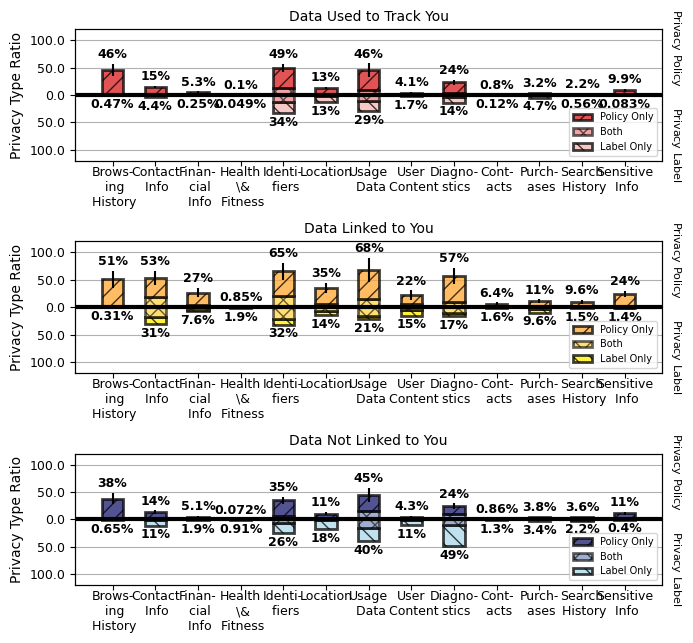

In [ ]:
plot_data_categories()

# App Cost

In [ ]:
# List of Apps with each Price Type
free = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['price'] == 0].loc[app_metadata['has_in_app_purchases'] == 0]['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))
free_in_app = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['price'] == 0].loc[app_metadata['has_in_app_purchases'] == 1]['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))
paid = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['price'] > 0].loc[app_metadata['has_in_app_purchases'] == 0]['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))
paid_in_app = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['price'] > 0].loc[app_metadata['has_in_app_purchases'] == 1]['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))

In [ ]:
# DATA_USED_TO_TRACK_YOU (RED)
privacy_type = 'privacy_type_track'

# Free Apps
t_app_store_free =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))
t_policy_free = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
t_app_store_free_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))
t_policy_free_in_app = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))

# Paid Apps
t_app_store_paid =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))
t_policy_paid = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
t_app_store_paid_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))
t_policy_paid_in_app = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))

In [ ]:
# DATA_LINKED_TO_YOU (YELLOW)
privacy_type = 'privacy_type_linked'

# Free Apps
l_app_store_free =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))
l_policy_free = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
l_app_store_free_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))
l_policy_free_in_app = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))

# Paid Apps
l_app_store_paid =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))
l_policy_paid = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
l_app_store_paid_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))
l_policy_paid_in_app = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))

In [ ]:
# DATA_NOT_LINKED_TO_YOU (BLUE)
privacy_type = 'privacy_type_not_linked'

# Free Apps
nl_app_store_free =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))
nl_policy_free = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
nl_app_store_free_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))
nl_policy_free_in_app = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))

# Paid Apps
nl_app_store_paid =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))
nl_policy_paid = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
nl_app_store_paid_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))
nl_policy_paid_in_app = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(policy_labels.loc[policy_labels[privacy_type] == 1]['policy_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))

In [ ]:
# DATA_NOT_COLLECTED (GREEN)
privacy_type = 'privacy_type_not_collected'

# Free Apps
nc_app_store_free =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))
nc_policy_free = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(policy_not_collected)].loc[app_to_policy['app_store_id'].isin(free)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
nc_app_store_free_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))
nc_policy_free_in_app = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(policy_not_collected)].loc[app_to_policy['app_store_id'].isin(free_in_app)]['app_store_id'].to_list()))

# Paid Apps
nc_app_store_paid =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))
nc_policy_paid = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(policy_not_collected)].loc[app_to_policy['app_store_id'].isin(paid)]['app_store_id'].to_list()))

# Free Apps with In-app Purchases
nc_app_store_paid_in_app =  list(set(app_to_policy.loc[app_to_policy['app_table_id'].isin(app_store_labels.loc[app_store_labels[privacy_type] == 1]['app_table_id'].to_list())].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))
nc_policy_paid_in_app = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(policy_not_collected)].loc[app_to_policy['app_store_id'].isin(paid_in_app)]['app_store_id'].to_list()))

In [ ]:
def plot_app_costs():
    import matplotlib.ticker as ticker

    def hex_to_rgb(value):
        value = value.lstrip('#')
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


    def rgb_to_hex(rgb):
        return '%02x%02x%02x' % rgb


    def mean_color(color1, color2):
        rgb1 = hex_to_rgb(color1)
        rgb2 = hex_to_rgb(color2)

        avg = lambda x, y: round((x+y) / 2)

        new_rgb = ()

        for i in range(len(rgb1)):
            new_rgb += (avg(rgb1[i], rgb2[i]),)

        return '#'+rgb_to_hex(new_rgb)

    def major_formatter(x, pos):
        label = str(-x) if x < 0 else str(x)
        return label

    labels = ['Free', 'Free\nIn-App', 'Paid', 'Paid\nIn-App']

    # Create a figure.
    fig = plt.figure()

    # Set the font size.
    plt.rcParams['font.size'] = '9'

    # Set the figure size.
    fig.set_size_inches(10.5, 6.0)

    # """
    # Data Used to Track You
    # """

    app_store_values = [len(set(t_app_store_free)-set(t_policy_free)) / len(free), len(set(t_app_store_free_in_app)-set(t_policy_free_in_app)) / len(free_in_app), len(set(t_app_store_paid)-set(t_policy_paid)) / len(paid), len(set(t_app_store_paid_in_app)-set(t_policy_paid_in_app)) / len(paid_in_app)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(t_policy_free)-set(t_app_store_free)) / len(free), len(set(t_policy_free_in_app)-set(t_app_store_free_in_app)) / len(free_in_app), len(set(t_policy_paid)-set(t_app_store_paid)) / len(paid), len(set(t_policy_paid_in_app)-set(t_app_store_paid_in_app)) / len(paid_in_app)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(t_policy_free).intersection(set(t_app_store_free))) / len(free), len(set(t_policy_free_in_app).intersection(set(t_app_store_free_in_app))) / len(free_in_app), len(set(t_policy_paid).intersection(set(t_app_store_paid))) / len(paid), len(set(t_policy_paid_in_app).intersection(set(t_app_store_paid_in_app))) / len(paid_in_app)]
    overlap = [x * (-100) for x in overlap_values]

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.14 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax1 = fig.add_subplot(141)
    ax1.set_ylim([-115, 115])
    ax1.set_title('Data Used to Track You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA USED TO TRACK YOU: App Store = '#F5B7B1'
    # DATA USED TO TRACK YOU: Polisis = '#D7191C'
    # DATA USED TO TRACK YOU: Overlap = mean_color('#F5B7B1','#D7191C') = '#E66866'
    rects1 = ax1.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#F5B7B1', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax1.bar(x, overlap, width, label='Both', color=mean_color('#F5B7B1','#D7191C'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax1.bar(x, overlap, width, color=mean_color('#F5B7B1','#D7191C'),
                     edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax1.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#D7191C', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_xticks(x, labels)

    ax1.legend(ax1.get_legend_handles_labels()[0][::-1], ax1.get_legend_handles_labels()[1][::-1], loc='lower left')

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax1.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax1.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax1.grid(True, axis='y')
    ax1.set_axisbelow(True)

    # change the fontsize
    ax1.tick_params(axis='x', labelsize=10, pad=0)

    # Set the label text for the first y-axis.
    ax1.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)

    ax1.yaxis.set_major_formatter(major_formatter)

    """
    Data Linked to You
    """

    app_store_values = [len(set(l_app_store_free)-set(l_policy_free)) / len(free), len(set(l_app_store_free_in_app)-set(l_policy_free_in_app)) / len(free_in_app), len(set(l_app_store_paid)-set(l_policy_paid)) / len(paid), len(set(l_app_store_paid_in_app)-set(l_policy_paid_in_app)) / len(paid_in_app)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(l_policy_free)-set(l_app_store_free)) / len(free), len(set(l_policy_free_in_app)-set(l_app_store_free_in_app)) / len(free_in_app), len(set(l_policy_paid)-set(l_app_store_paid)) / len(paid), len(set(l_policy_paid_in_app)-set(l_app_store_paid_in_app)) / len(paid_in_app)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(l_policy_free).intersection(set(l_app_store_free))) / len(free), len(set(l_policy_free_in_app).intersection(set(l_app_store_free_in_app))) / len(free_in_app), len(set(l_policy_paid).intersection(set(l_app_store_paid))) / len(paid), len(set(l_policy_paid_in_app).intersection(set(l_app_store_paid_in_app))) / len(paid_in_app)]
    overlap = [x * (-100) for x in overlap_values]


    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.17 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax2 = fig.add_subplot(142)
    ax2.set_ylim([-115, 115])
    ax2.set_title('Data Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA LINKED TO YOU: App Store = '#FFEF00'
    # DATA LINKED TO YOU: Polisis = '#FFA62F'
    # DATA LINKED TO YOU: Overlap = mean_color('#FFEF00','#FFA62F') = '#FFCA18'
    rects1 = ax2.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#FFEF00', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax2.bar(x, overlap, width, label='Both', color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax2.bar(x, overlap, width, color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black',
                    linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax2.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#FFA62F', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_xticks(x, labels)

    ax2.legend(ax2.get_legend_handles_labels()[0][::-1], ax2.get_legend_handles_labels()[1][::-1], loc='lower left')

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax2.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax2.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')


    # Show the grid lines.
    ax2.grid(True, axis='y')
    ax2.set_axisbelow(True)

    # change the fontsize
    ax2.tick_params(axis='x', labelsize=10, pad=0)

    # Remove little ticks on y-axis.
    for tick in ax2.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    # """
    # Data Not Linked to You
    # """

    app_store_values = [len(set(nl_app_store_free)-set(nl_policy_free)) / len(free), len(set(nl_app_store_free_in_app)-set(nl_policy_free_in_app)) / len(free_in_app), len(set(nl_app_store_paid)-set(nl_policy_paid)) / len(paid), len(set(nl_app_store_paid_in_app)-set(nl_policy_paid_in_app)) / len(paid_in_app)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(nl_policy_free)-set(nl_app_store_free)) / len(free), len(set(nl_policy_free_in_app)-set(nl_app_store_free_in_app)) / len(free_in_app), len(set(nl_policy_paid)-set(nl_app_store_paid)) / len(paid), len(set(nl_policy_paid_in_app)-set(nl_app_store_paid_in_app)) / len(paid_in_app)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(nl_policy_free).intersection(set(nl_app_store_free))) / len(free), len(set(nl_policy_free_in_app).intersection(set(nl_app_store_free_in_app))) / len(free_in_app), len(set(nl_policy_paid).intersection(set(nl_app_store_paid))) / len(paid), len(set(nl_policy_paid_in_app).intersection(set(nl_app_store_paid_in_app))) / len(paid_in_app)]
    overlap = [x * (-100) for x in overlap_values]


    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.14 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax3 = fig.add_subplot(143)
    ax3.set_ylim([-115, 115])
    ax3.set_title('Data Not Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA NOT LINKED TO YOU: App Store = '#ABD9E9'
    # DATA NOT LINKED TO YOU: Polisis = '#191970'
    # DATA NOT LINKED TO YOU: Overlap = mean_color('#ABD9E9','#191970') = '#6279AC'
    rects1 = ax3.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#ABD9E9', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax3.bar(x, overlap, width, label='Both', color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]

    rects3 = ax3.bar(x, overlap, width, color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax3.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#191970', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_xticks(x, labels)

    ax3.legend(ax3.get_legend_handles_labels()[0][::-1], ax3.get_legend_handles_labels()[1][::-1], loc='lower left')

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax3.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax3.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax3.grid(True, axis='y')
    ax3.set_axisbelow(True)

    # change the fontsize
    ax3.tick_params(axis='x', labelsize=10, pad=0)

    # Remove little ticks on y-axis.
    for tick in ax3.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    """
    Data Not Collected
    """

    app_store_values = [len(set(nc_app_store_free)-set(nc_policy_free)) / len(free), len(set(nc_app_store_free_in_app)-set(nc_policy_free_in_app)) / len(free_in_app), len(set(nc_app_store_paid)-set(nc_policy_paid)) / len(paid), len(set(nc_app_store_paid_in_app)-set(nc_policy_paid_in_app)) / len(paid_in_app)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(nc_policy_free)-set(nc_app_store_free)) / len(free), len(set(nc_policy_free_in_app)-set(nc_app_store_free_in_app)) / len(free_in_app), len(set(nc_policy_paid)-set(nc_app_store_paid)) / len(paid), len(set(nc_policy_paid_in_app)-set(nc_app_store_paid_in_app)) / len(paid_in_app)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(nc_policy_free).intersection(set(nc_app_store_free))) / len(free), len(set(nc_policy_free_in_app).intersection(set(nc_app_store_free_in_app))) / len(free_in_app), len(set(nc_policy_paid).intersection(set(nc_app_store_paid))) / len(paid), len(set(nc_policy_paid_in_app).intersection(set(nc_app_store_paid_in_app))) / len(paid_in_app)]
    overlap = [x * (-100) for x in overlap_values]


    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.23 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax4 = fig.add_subplot(144)
    ax4.set_ylim([-115, 115])
    ax4.set_title('Data Not Collected', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA NOT COLLECTED: App Store = '#b8e186'
    # DATA NOT COLLECTED: Polisis = '#4dac26'
    # DATA NOT COLLECTED: Overlap = mean_color('#b8e186','#4dac26')
    rects1 = ax4.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#b8e186', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax4.bar(x, overlap, width, label='Both', color=mean_color('#b8e186','#4dac26'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    overlap = [x * -1 for x in overlap]
    rects3 = ax4.bar(x, overlap, width, color=mean_color('#b8e186','#4dac26'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax4.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#4dac26', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax4.set_xticks(x, labels)

    ax4.legend(ax4.get_legend_handles_labels()[0][::-1], ax4.get_legend_handles_labels()[1][::-1], loc='upper left')

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax4.bar_label(rects4, labels=['%.2g%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax4.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Show the grid lines.
    ax4.grid(True, axis='y')
    ax4.set_axisbelow(True)

    # change the fontsize
    ax4.tick_params(axis='x', labelsize=10, pad=0)


    # Set the label text for the first y-axis.
    #ax4.yaxis.set_label_text('Privacy Label                            Privacy Policy', rotation=-90, fontsize=10,   weight='bold')
    ax4.yaxis.set_label_text('Privacy Policy$\quad\quad\quad\quad\quad\quad\quad$Privacy Label', rotation=-90, fontsize=10)
    ax4.yaxis.set_label_position("right")
    ax4.yaxis.labelpad = 15

    # Remove little ticks on y-axis.
    for tick in ax4.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    # Adjust the space between the sub plots.
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.03)

    # ax1.axhline(0, linewidth=3, color='black')
    ax2.axhline(0, linewidth=3, color='black')
    # ax3.axhline(0, linewidth=3, color='black')
    ax4.axhline(0, linewidth=3, color='black')

    # Adjust the space between the sub plots.
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.03)

    # Show/Save the figure.
    plt.show()


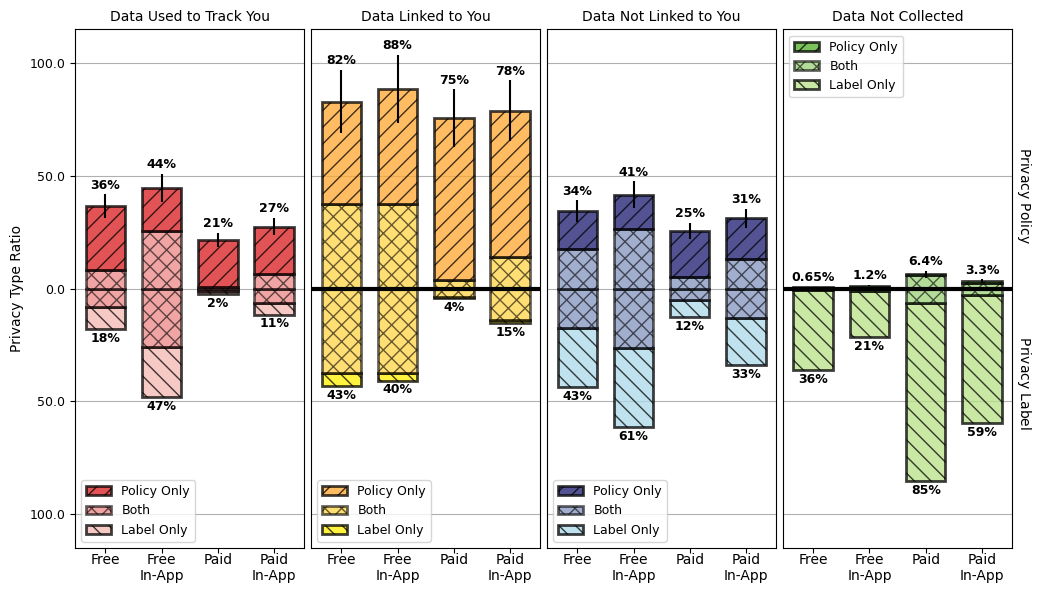

In [ ]:
plot_app_costs()

# Content Rating

In [ ]:
# List of Apps with each Content Rating
app_metadata['content_rating'].unique()
four_plus = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['content_rating'] == '4+']['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))
nine_plus = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['content_rating'] == '9+']['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))
twelve_plus = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['content_rating'] == '12+']['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))
seventeen_plus = list(set(app_to_policy.loc[app_to_policy['app_store_id'].isin(app_metadata.loc[app_metadata['content_rating'] == '17+']['app_id'].to_list())].loc[app_to_policy['app_store_id'].isin(evaluated_app_ids)]['app_store_id'].to_list()))

In [ ]:
# Policies that address children
policies_children = list(set(app_to_policy.loc[app_to_policy['privacy_policy_index'].isin(privbert_results.loc[privbert_results['main_audience'] == 1].loc[privbert_results['children'] == 1]['policy_id'].to_list())]['app_store_id'].to_list()))

In [ ]:
# Content Rating on App Store and Policy Addressing Children

# DATA_USED_TO_TRACK_YOU (RED)

# Content Rating: 4+
t_app_store_four_plus = list(set(four_plus).intersection(set(app_store_track)))
t_app_store_four_plus_children = list(set(t_app_store_four_plus).intersection(set(policies_children)))
t_policy_four_plus = list(set(four_plus).intersection(set(policy_track)))
t_policy_four_plus_children = list(set(t_policy_four_plus).intersection(set(policies_children)))

# Content Rating: 9+
t_app_store_nine_plus = list(set(nine_plus).intersection(set(app_store_track)))
t_app_store_nine_plus_children = list(set(t_app_store_nine_plus).intersection(set(policies_children)))
t_policy_nine_plus = list(set(nine_plus).intersection(set(policy_track)))
t_policy_nine_plus_children = list(set(t_policy_nine_plus).intersection(set(policies_children)))

# Content Rating: 12+
t_app_store_twelve_plus = list(set(twelve_plus).intersection(set(app_store_track)))
t_app_store_twelve_plus_children = list(set(t_app_store_twelve_plus).intersection(set(policies_children)))
t_policy_twelve_plus = list(set(twelve_plus).intersection(set(policy_track)))
t_policy_twelve_plus_children = list(set(t_policy_twelve_plus).intersection(set(policies_children)))

# Content Rating: 17+
t_app_store_seventeen_plus = list(set(seventeen_plus).intersection(set(app_store_track)))
t_app_store_seventeen_plus_children = list(set(t_app_store_seventeen_plus).intersection(set(policies_children)))
t_policy_seventeen_plus = list(set(seventeen_plus).intersection(set(policy_track)))
t_policy_seventeen_plus_children = list(set(t_policy_seventeen_plus).intersection(set(policies_children)))

In [ ]:
# DATA_LINKED_TO_YOU (YELLOW)

# Content Rating: 4+
l_app_store_four_plus = list(set(four_plus).intersection(set(app_store_linked)))
l_app_store_four_plus_children = list(set(l_app_store_four_plus).intersection(set(policies_children)))
l_policy_four_plus = list(set(four_plus).intersection(set(policy_linked)))
l_policy_four_plus_children = list(set(l_policy_four_plus).intersection(set(policies_children)))

# Content Rating: 9+
l_app_store_nine_plus = list(set(nine_plus).intersection(set(app_store_linked)))
l_app_store_nine_plus_children = list(set(l_app_store_nine_plus).intersection(set(policies_children)))
l_policy_nine_plus = list(set(nine_plus).intersection(set(policy_linked)))
l_policy_nine_plus_children = list(set(l_policy_nine_plus).intersection(set(policies_children)))

# Content Rating: 12+
l_app_store_twelve_plus = list(set(twelve_plus).intersection(set(app_store_linked)))
l_app_store_twelve_plus_children = list(set(l_app_store_twelve_plus).intersection(set(policies_children)))
l_policy_twelve_plus = list(set(twelve_plus).intersection(set(policy_linked)))
l_policy_twelve_plus_children = list(set(l_policy_twelve_plus).intersection(set(policies_children)))

# Content Rating: 17+
l_app_store_seventeen_plus = list(set(seventeen_plus).intersection(set(app_store_linked)))
l_app_store_seventeen_plus_children = list(set(l_app_store_seventeen_plus).intersection(set(policies_children)))
l_policy_seventeen_plus = list(set(seventeen_plus).intersection(set(policy_linked)))
l_policy_seventeen_plus_children = list(set(l_policy_seventeen_plus).intersection(set(policies_children)))

In [ ]:
# DATA_NOT_LINKED_TO_YOU (BLUE)

# Content Rating: 4+
nl_app_store_four_plus = list(set(four_plus).intersection(set(app_store_not_linked)))
nl_app_store_four_plus_children = list(set(nl_app_store_four_plus).intersection(set(policies_children)))
nl_policy_four_plus = list(set(four_plus).intersection(set(policy_not_linked)))
nl_policy_four_plus_children = list(set(nl_policy_four_plus).intersection(set(policies_children)))

# Content Rating: 9+
nl_app_store_nine_plus = list(set(nine_plus).intersection(set(app_store_not_linked)))
nl_app_store_nine_plus_children = list(set(nl_app_store_nine_plus).intersection(set(policies_children)))
nl_policy_nine_plus = list(set(nine_plus).intersection(set(policy_not_linked)))
nl_policy_nine_plus_children = list(set(nl_policy_nine_plus).intersection(set(policies_children)))

# Content Rating: 12+
nl_app_store_twelve_plus = list(set(twelve_plus).intersection(set(app_store_not_linked)))
nl_app_store_twelve_plus_children = list(set(nl_app_store_twelve_plus).intersection(set(policies_children)))
nl_policy_twelve_plus = list(set(twelve_plus).intersection(set(policy_not_linked)))
nl_policy_twelve_plus_children = list(set(nl_policy_twelve_plus).intersection(set(policies_children)))

# Content Rating: 17+
nl_app_store_seventeen_plus = list(set(seventeen_plus).intersection(set(app_store_not_linked)))
nl_app_store_seventeen_plus_children = list(set(nl_app_store_seventeen_plus).intersection(set(policies_children)))
nl_policy_seventeen_plus = list(set(seventeen_plus).intersection(set(policy_not_linked)))
nl_policy_seventeen_plus_children = list(set(nl_policy_seventeen_plus).intersection(set(policies_children)))

In [ ]:
# DATA_NOT_COLLECTED (GREEN)

# Content Rating: 4+
nc_app_store_four_plus = list(set(four_plus).intersection(set(app_store_not_collected)))
nc_app_store_four_plus_children = list(set(nc_app_store_four_plus).intersection(set(policies_children)))
nc_policy_four_plus = list(set(four_plus).intersection(set(policy_not_collected)))
nc_policy_four_plus_children = list(set(nc_policy_four_plus).intersection(set(policies_children)))

# Content Rating: 9+
nc_app_store_nine_plus = list(set(nine_plus).intersection(set(app_store_not_collected)))
nc_app_store_nine_plus_children = list(set(nc_app_store_nine_plus).intersection(set(policies_children)))
nc_policy_nine_plus = list(set(nine_plus).intersection(set(policy_not_collected)))
nc_policy_nine_plus_children = list(set(nc_policy_nine_plus).intersection(set(policies_children)))

# Content Rating: 12+
nc_app_store_twelve_plus = list(set(twelve_plus).intersection(set(app_store_not_collected)))
nc_app_store_twelve_plus_children = list(set(nc_app_store_twelve_plus).intersection(set(policies_children)))
nc_policy_twelve_plus = list(set(twelve_plus).intersection(set(policy_not_collected)))
nc_policy_twelve_plus_children = list(set(nc_policy_twelve_plus).intersection(set(policies_children)))

# Content Rating: 17+
nc_app_store_seventeen_plus = list(set(seventeen_plus).intersection(set(app_store_not_collected)))
nc_app_store_seventeen_plus_children = list(set(nc_app_store_seventeen_plus).intersection(set(policies_children)))
nc_policy_seventeen_plus = list(set(seventeen_plus).intersection(set(policy_not_collected)))
nc_policy_seventeen_plus_children = list(set(nc_policy_seventeen_plus).intersection(set(policies_children)))

In [ ]:
def plot_content_rating_and_children():
    import matplotlib.ticker as ticker

    def hex_to_rgb(value):
        value = value.lstrip('#')
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


    def rgb_to_hex(rgb):
        return '%02x%02x%02x' % rgb


    def mean_color(color1, color2):
        rgb1 = hex_to_rgb(color1)
        rgb2 = hex_to_rgb(color2)

        avg = lambda x, y: round((x+y) / 2)

        new_rgb = ()

        for i in range(len(rgb1)):
            new_rgb += (avg(rgb1[i], rgb2[i]),)

        return '#'+rgb_to_hex(new_rgb)

    def major_formatter(x, pos):
        label = str(-x) if x < 0 else str(x)
        return label

    # Colors:

    # DATA LINKED TO YOU: App Store = '#FFEF00'
    # DATA LINKED TO YOU: Polisis = '#FFA62F'
    # DATA LINKED TO YOU: Overlap = mean_color('#FFEF00','#FFA62F') = '#FFCA18'

    # DATA NOT LINKED TO YOU: App Store = '#ABD9E9'
    # DATA NOT LINKED TO YOU: Polisis = '#191970'
    # DATA NOT LINKED TO YOU: Overlap = mean_color('#ABD9E9','#191970') = '#6279AC'

    # DATA USED TO TRACK YOU: App Store = '#F5B7B1'
    # DATA USED TO TRACK YOU: Polisis = '#D7191C'
    # DATA USED TO TRACK YOU: Overlap = mean_color('#F5B7B1','#D7191C') = '#E66866'

    # DATA NOT COLLECTED: App Store = '#b8e186'
    # DATA NOT COLLECTED: Polisis = '#4dac26'
    # DATA NOT COLLECTED: Overlap = mean_color('#b8e186','#4dac26')

    labels = ['4+', '9+', '12+', '17+']

    # Create a figure.
    fig = plt.figure()

    # Set the font size.
    plt.rcParams['font.size'] = '9'

    # Set the figure size.
    # fig.set_size_inches(10.5, 6.0)
    fig.set_size_inches(7, 4.4)

    """
    Data Used to Track You
    """

    app_store_values = [len(set(t_app_store_four_plus)-set(t_policy_four_plus)) / len(four_plus), len(set(t_app_store_nine_plus)-set(t_policy_nine_plus)) / len(nine_plus), len(set(t_app_store_twelve_plus)-set(t_policy_twelve_plus)) / len(twelve_plus), len(set(t_app_store_seventeen_plus)-set(t_policy_seventeen_plus)) / len(seventeen_plus)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(t_policy_four_plus)-set(t_app_store_four_plus)) / len(four_plus), len(set(t_policy_nine_plus)-set(t_app_store_nine_plus)) / len(nine_plus), len(set(t_policy_twelve_plus)-set(t_app_store_twelve_plus)) / len(twelve_plus), len(set(t_policy_seventeen_plus)-set(t_app_store_seventeen_plus)) / len(seventeen_plus)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(t_policy_four_plus).intersection(set(t_app_store_four_plus))) / len(four_plus), len(set(t_policy_nine_plus).intersection(set(t_app_store_nine_plus))) / len(nine_plus), len(set(t_policy_twelve_plus).intersection(set(t_app_store_twelve_plus))) / len(twelve_plus), len(set(t_policy_seventeen_plus).intersection(set(t_app_store_seventeen_plus))) / len(seventeen_plus)]
    overlap = [x * (-100) for x in overlap_values]


    app_store_children_values = [len(set(t_app_store_four_plus_children)-set(t_policy_four_plus_children)) / len(four_plus), len(set(t_app_store_nine_plus_children)-set(t_policy_nine_plus_children)) / len(nine_plus), len(set(t_app_store_twelve_plus_children)-set(t_policy_twelve_plus_children)) / len(twelve_plus), len(set(t_app_store_seventeen_plus_children)-set(t_policy_seventeen_plus_children)) / len(seventeen_plus)]
    app_store_children = [x * (-100) for x in app_store_children_values]

    polisis_children_values = [len(set(t_policy_four_plus_children)-set(t_app_store_four_plus_children)) / len(four_plus), len(set(t_policy_nine_plus_children)-set(t_app_store_nine_plus_children)) / len(nine_plus), len(set(t_policy_twelve_plus_children)-set(t_app_store_twelve_plus_children)) / len(twelve_plus), len(set(t_policy_seventeen_plus_children)-set(t_app_store_seventeen_plus_children)) / len(seventeen_plus)]
    polisis_children = [x * (100) for x in polisis_children_values]

    overlap_children_values = [len(set(t_policy_four_plus_children).intersection(set(t_app_store_four_plus_children))) / len(four_plus), len(set(t_policy_nine_plus_children).intersection(set(t_app_store_nine_plus_children))) / len(nine_plus), len(set(t_policy_twelve_plus_children).intersection(set(t_app_store_twelve_plus_children))) / len(twelve_plus), len(set(t_policy_seventeen_plus_children).intersection(set(t_app_store_seventeen_plus_children))) / len(seventeen_plus)]
    overlap_children = [x * (-100) for x in overlap_children_values]

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.14 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax1 = fig.add_subplot(141)
    ax1.set_ylim([-112, 112])
    ax1.set_title('Data Used to Track You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA USED TO TRACK YOU: App Store = '#F5B7B1'
    # DATA USED TO TRACK YOU: Polisis = '#D7191C'
    # DATA USED TO TRACK YOU: Overlap = mean_color('#F5B7B1','#D7191C') = '#E66866'
    rects1 = ax1.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#F5B7B1', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax1.bar(x, overlap, width, label='Both', color=mean_color('#F5B7B1','#D7191C'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")


    app_store_children_total = list(np.add(np.array(app_store_children), np.array(overlap_children)))
    rects_children_store = ax1.bar(x, app_store_children_total, width, color='white', edgecolor = 'black',linewidth=2, alpha=0.75)

    overlap = [x * -1 for x in overlap]
    overlap_children_neg = [x * -1 for x in overlap_children]

    polisis_children_total = list(np.add(np.array(polisis_children), np.array(overlap_children_neg)))

    rects3 = ax1.bar(x, overlap, width, color=mean_color('#F5B7B1','#D7191C'),
                    edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax1.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#D7191C', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")
    rects_children_policy = ax1.bar(x, polisis_children_total, width, label='Address Children', color='white', edgecolor = 'black',linewidth=2, alpha=0.75)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_xticks(x, labels)

    ax1.legend(ax1.get_legend_handles_labels()[0][::-1], ax1.get_legend_handles_labels()[1][::-1], loc='lower left', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax1.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax1.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Percentages for Children
    ax1.bar_label(rects_children_store, labels=['%d%%' % -e for e in app_store_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)
    ax1.bar_label(rects_children_policy, labels=['%d%%' % e for e in polisis_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)

    # Show the grid lines.
    ax1.grid(True, axis='y')
    ax1.set_axisbelow(True)

    # change the fontsize
    ax1.tick_params(axis='x', labelsize=10, pad=0)

    # Set the label text for the first y-axis.
    ax1.yaxis.set_label_text('Privacy Type Ratio', fontsize=10)

    ax1.yaxis.set_major_formatter(major_formatter)

    """
    Data Linked to You
    """

    app_store_values = [len(set(l_app_store_four_plus)-set(l_policy_four_plus)) / len(four_plus), len(set(l_app_store_nine_plus)-set(l_policy_nine_plus)) / len(nine_plus), len(set(l_app_store_twelve_plus)-set(l_policy_twelve_plus)) / len(twelve_plus), len(set(l_app_store_seventeen_plus)-set(l_policy_seventeen_plus)) / len(seventeen_plus)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(l_policy_four_plus)-set(l_app_store_four_plus)) / len(four_plus), len(set(l_policy_nine_plus)-set(l_app_store_nine_plus)) / len(nine_plus), len(set(l_policy_twelve_plus)-set(l_app_store_twelve_plus)) / len(twelve_plus), len(set(l_policy_seventeen_plus)-set(l_app_store_seventeen_plus)) / len(seventeen_plus)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(l_policy_four_plus).intersection(set(l_app_store_four_plus))) / len(four_plus), len(set(l_policy_nine_plus).intersection(set(l_app_store_nine_plus))) / len(nine_plus), len(set(l_policy_twelve_plus).intersection(set(l_app_store_twelve_plus))) / len(twelve_plus), len(set(l_policy_seventeen_plus).intersection(set(l_app_store_seventeen_plus))) / len(seventeen_plus)]
    overlap = [x * (-100) for x in overlap_values]


    app_store_children_values = [len(set(l_app_store_four_plus_children)-set(l_policy_four_plus_children)) / len(four_plus), len(set(l_app_store_nine_plus_children)-set(l_policy_nine_plus_children)) / len(nine_plus), len(set(l_app_store_twelve_plus_children)-set(l_policy_twelve_plus_children)) / len(twelve_plus), len(set(l_app_store_seventeen_plus_children)-set(l_policy_seventeen_plus_children)) / len(seventeen_plus)]
    app_store_children = [x * (-100) for x in app_store_children_values]

    polisis_children_values = [len(set(l_policy_four_plus_children)-set(l_app_store_four_plus_children)) / len(four_plus), len(set(l_policy_nine_plus_children)-set(l_app_store_nine_plus_children)) / len(nine_plus), len(set(l_policy_twelve_plus_children)-set(l_app_store_twelve_plus_children)) / len(twelve_plus), len(set(l_policy_seventeen_plus_children)-set(l_app_store_seventeen_plus_children)) / len(seventeen_plus)]
    polisis_children = [x * (100) for x in polisis_children_values]

    overlap_children_values = [len(set(l_policy_four_plus_children).intersection(set(l_app_store_four_plus_children))) / len(four_plus), len(set(l_policy_nine_plus_children).intersection(set(l_app_store_nine_plus_children))) / len(nine_plus), len(set(l_policy_twelve_plus_children).intersection(set(l_app_store_twelve_plus_children))) / len(twelve_plus), len(set(l_policy_seventeen_plus_children).intersection(set(l_app_store_seventeen_plus_children))) / len(seventeen_plus)]
    overlap_children = [x * (-100) for x in overlap_children_values]

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.17 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax2 = fig.add_subplot(142)
    ax2.set_ylim([-112, 112])
    ax2.set_title('Data Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA LINKED TO YOU: App Store = '#FFEF00'
    # DATA LINKED TO YOU: Polisis = '#FFA62F'
    # DATA LINKED TO YOU: Overlap = mean_color('#FFEF00','#FFA62F') = '#FFCA18'
    rects1 = ax2.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#FFEF00', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax2.bar(x, overlap, width, label='Both', color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    app_store_children_total = list(np.add(np.array(app_store_children), np.array(overlap_children)))
    rects_children_store = ax2.bar(x, app_store_children_total, width, color='white', edgecolor = 'black',linewidth=2, alpha=0.75)

    overlap = [x * -1 for x in overlap]
    overlap_children_neg = [x * -1 for x in overlap_children]

    polisis_children_total = list(np.add(np.array(polisis_children), np.array(overlap_children_neg)))


    rects3 = ax2.bar(x, overlap, width, color=mean_color('#FFEF00','#FFA62F'), edgecolor = 'black',
                    linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax2.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#FFA62F', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")
    rects_children_policy = ax2.bar(x, polisis_children_total, width, label='Address Children', color='white', edgecolor = 'black',linewidth=2, alpha=0.75)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_xticks(x, labels)

    ax2.legend(ax2.get_legend_handles_labels()[0][::-1], ax2.get_legend_handles_labels()[1][::-1], loc='lower left', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax2.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax2.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Percentages for Children
    ax2.bar_label(rects_children_store, labels=['%d%%' % -e for e in app_store_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)
    ax2.bar_label(rects_children_policy, labels=['%d%%' % e for e in polisis_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)

    # Show the grid lines.
    ax2.grid(True, axis='y')
    ax2.set_axisbelow(True)

    # change the fontsize
    ax2.tick_params(axis='x', labelsize=10, pad=0)

    # Remove little ticks on y-axis.
    for tick in ax2.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    """
    Data Not Linked to You
    """

    app_store_values = [len(set(nl_app_store_four_plus)-set(nl_policy_four_plus)) / len(four_plus), len(set(nl_app_store_nine_plus)-set(nl_policy_nine_plus)) / len(nine_plus), len(set(nl_app_store_twelve_plus)-set(nl_policy_twelve_plus)) / len(twelve_plus), len(set(nl_app_store_seventeen_plus)-set(nl_policy_seventeen_plus)) / len(seventeen_plus)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(nl_policy_four_plus)-set(nl_app_store_four_plus)) / len(four_plus), len(set(nl_policy_nine_plus)-set(nl_app_store_nine_plus)) / len(nine_plus), len(set(nl_policy_twelve_plus)-set(nl_app_store_twelve_plus)) / len(twelve_plus), len(set(nl_policy_seventeen_plus)-set(nl_app_store_seventeen_plus)) / len(seventeen_plus)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(nl_policy_four_plus).intersection(set(nl_app_store_four_plus))) / len(four_plus), len(set(nl_policy_nine_plus).intersection(set(nl_app_store_nine_plus))) / len(nine_plus), len(set(nl_policy_twelve_plus).intersection(set(nl_app_store_twelve_plus))) / len(twelve_plus), len(set(nl_policy_seventeen_plus).intersection(set(nl_app_store_seventeen_plus))) / len(seventeen_plus)]
    overlap = [x * (-100) for x in overlap_values]


    app_store_children_values = [len(set(nl_app_store_four_plus_children)-set(nl_policy_four_plus_children)) / len(four_plus), len(set(nl_app_store_nine_plus_children)-set(nl_policy_nine_plus_children)) / len(nine_plus), len(set(nl_app_store_twelve_plus_children)-set(nl_policy_twelve_plus_children)) / len(twelve_plus), len(set(nl_app_store_seventeen_plus_children)-set(nl_policy_seventeen_plus_children)) / len(seventeen_plus)]
    app_store_children = [x * (-100) for x in app_store_children_values]

    polisis_children_values = [len(set(nl_policy_four_plus_children)-set(nl_app_store_four_plus_children)) / len(four_plus), len(set(nl_policy_nine_plus_children)-set(nl_app_store_nine_plus_children)) / len(nine_plus), len(set(nl_policy_twelve_plus_children)-set(nl_app_store_twelve_plus_children)) / len(twelve_plus), len(set(nl_policy_seventeen_plus_children)-set(nl_app_store_seventeen_plus_children)) / len(seventeen_plus)]
    polisis_children = [x * (100) for x in polisis_children_values]

    overlap_children_values = [len(set(nl_policy_four_plus_children).intersection(set(nl_app_store_four_plus_children))) / len(four_plus), len(set(nl_policy_nine_plus_children).intersection(set(nl_app_store_nine_plus_children))) / len(nine_plus), len(set(nl_policy_twelve_plus_children).intersection(set(nl_app_store_twelve_plus_children))) / len(twelve_plus), len(set(nl_policy_seventeen_plus_children).intersection(set(nl_app_store_seventeen_plus_children))) / len(seventeen_plus)]
    overlap_children = [x * (-100) for x in overlap_children_values]


    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.14 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax3 = fig.add_subplot(143)
    ax3.set_ylim([-112, 112])
    ax3.set_title('Data Not Linked to You', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA NOT LINKED TO YOU: App Store = '#ABD9E9'
    # DATA NOT LINKED TO YOU: Polisis = '#191970'
    # DATA NOT LINKED TO YOU: Overlap = mean_color('#ABD9E9','#191970') = '#6279AC'
    rects1 = ax3.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#ABD9E9', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax3.bar(x, overlap, width, label='Both', color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    app_store_children_total = list(np.add(np.array(app_store_children), np.array(overlap_children)))
    rects_children_store = ax3.bar(x, app_store_children_total, width, color='white', edgecolor = 'black',linewidth=2, alpha=0.75)

    overlap = [x * -1 for x in overlap]
    overlap_children_neg = [x * -1 for x in overlap_children]

    polisis_children_total = list(np.add(np.array(polisis_children), np.array(overlap_children_neg)))


    rects3 = ax3.bar(x, overlap, width, color=mean_color('#ABD9E9','#191970'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax3.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#191970', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")
    rects_children_policy = ax3.bar(x, polisis_children_total, width, label='Address Children', color='white', edgecolor = 'black',linewidth=2, alpha=0.75)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_xticks(x, labels)

    ax3.legend(ax3.get_legend_handles_labels()[0][::-1], ax3.get_legend_handles_labels()[1][::-1], loc='lower left', prop={'size': 7})


    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax3.bar_label(rects4, labels=['%d%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax3.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Percentages for Children
    ax3.bar_label(rects_children_store, labels=['%d%%' % -e for e in app_store_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)
    ax3.bar_label(rects_children_policy, labels=['%d%%' % e for e in polisis_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)

    # Show the grid lines.
    ax3.grid(True, axis='y')
    ax3.set_axisbelow(True)

    # change the fontsize
    ax3.tick_params(axis='x', labelsize=10, pad=0)

    # Remove little ticks on y-axis.
    for tick in ax3.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    """
    Data Not Collected
    """

    app_store_values = [len(set(nc_app_store_four_plus)-set(nc_policy_four_plus)) / len(four_plus), len(set(nc_app_store_nine_plus)-set(nc_policy_nine_plus)) / len(nine_plus), len(set(nc_app_store_twelve_plus)-set(nc_policy_twelve_plus)) / len(twelve_plus), len(set(nc_app_store_seventeen_plus)-set(nc_policy_seventeen_plus)) / len(seventeen_plus)]
    app_store = [x * (-100) for x in app_store_values]

    polisis_values = [len(set(nc_policy_four_plus)-set(nc_app_store_four_plus)) / len(four_plus), len(set(nc_policy_nine_plus)-set(nc_app_store_nine_plus)) / len(nine_plus), len(set(nc_policy_twelve_plus)-set(nc_app_store_twelve_plus)) / len(twelve_plus), len(set(nc_policy_seventeen_plus)-set(nc_app_store_seventeen_plus)) / len(seventeen_plus)]
    polisis = [x * (100) for x in polisis_values]

    overlap_values = [len(set(nc_policy_four_plus).intersection(set(nc_app_store_four_plus))) / len(four_plus), len(set(nc_policy_nine_plus).intersection(set(nc_app_store_nine_plus))) / len(nine_plus), len(set(nc_policy_twelve_plus).intersection(set(nc_app_store_twelve_plus))) / len(twelve_plus), len(set(nc_policy_seventeen_plus).intersection(set(nc_app_store_seventeen_plus))) / len(seventeen_plus)]
    overlap = [x * (-100) for x in overlap_values]


    app_store_children_values = [len(set(nc_app_store_four_plus_children)-set(nc_policy_four_plus_children)) / len(four_plus), len(set(nc_app_store_nine_plus_children)-set(nc_policy_nine_plus_children)) / len(nine_plus), len(set(nc_app_store_twelve_plus_children)-set(nc_policy_twelve_plus_children)) / len(twelve_plus), len(set(nc_app_store_seventeen_plus_children)-set(nc_policy_seventeen_plus_children)) / len(seventeen_plus)]
    app_store_children = [x * (-100) for x in app_store_children_values]

    polisis_children_values = [len(set(nc_policy_four_plus_children)-set(nc_app_store_four_plus_children)) / len(four_plus), len(set(nc_policy_nine_plus_children)-set(nc_app_store_nine_plus_children)) / len(nine_plus), len(set(nc_policy_twelve_plus_children)-set(nc_app_store_twelve_plus_children)) / len(twelve_plus), len(set(nc_policy_seventeen_plus_children)-set(nc_app_store_seventeen_plus_children)) / len(seventeen_plus)]
    polisis_children = [x * (100) for x in polisis_children_values]

    overlap_children_values = [len(set(nc_policy_four_plus_children).intersection(set(nc_app_store_four_plus_children))) / len(four_plus), len(set(nc_policy_nine_plus_children).intersection(set(nc_app_store_nine_plus_children))) / len(nine_plus), len(set(nc_policy_twelve_plus_children).intersection(set(nc_app_store_twelve_plus_children))) / len(twelve_plus), len(set(nc_policy_seventeen_plus_children).intersection(set(nc_app_store_seventeen_plus_children))) / len(seventeen_plus)]
    overlap_children = [x * (-100) for x in overlap_children_values]


    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))

    # Error
    # DUTY Error: 1 - (0.92 * 0.94) = 0.14
    # DLY Error: 1  - (0.90 * 0.92) = 0.17
    # DNLY Error: 1 - (0.90 * 0.96) = 0.14
    # DNC Error: 1 - (0.90 * 0.86) = 0.23
    overall_values = list(np.add(np.array(polisis_values), np.array(overlap_values)))
    error_values = [0.23 * x for x in overall_values]
    error = [x * 100 for x in error_values]

    to_bottom = list(np.add(np.array(app_store), np.array(overlap)))


    # Divide the figure into a 1x4 grid, and give me the first section
    ax4 = fig.add_subplot(144)
    ax4.set_ylim([-112, 112])
    ax4.set_title('Data Not Collected', fontsize=10)

    x = np.arange(len(labels))  # the label locations
    width = 0.7  # the width of the bars

    # DATA NOT COLLECTED: App Store = '#b8e186'
    # DATA NOT COLLECTED: Polisis = '#4dac26'
    # DATA NOT COLLECTED: Overlap = mean_color('#b8e186','#4dac26')
    rects1 = ax4.bar(x, app_store, width, bottom=overlap, label='Label Only', color='#b8e186', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="\\\\")
    rects2 = ax4.bar(x, overlap, width, label='Both', color=mean_color('#b8e186','#4dac26'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")

    app_store_children_total = list(np.add(np.array(app_store_children), np.array(overlap_children)))
    rects_children_store = ax4.bar(x, app_store_children_total, width, color='white', edgecolor = 'black',linewidth=2, alpha=0.75)


    overlap = [x * -1 for x in overlap]
    overlap_children_neg = [x * -1 for x in overlap_children]

    polisis_children_total = list(np.add(np.array(polisis_children), np.array(overlap_children_neg)))


    rects3 = ax4.bar(x, overlap, width, color=mean_color('#b8e186','#4dac26'), edgecolor = 'black', linewidth=2, alpha=0.6, hatch="xx")
    rects4 = ax4.bar(x, polisis, width, yerr=error, bottom=overlap, label='Policy Only', color='#4dac26', edgecolor = 'black',linewidth=2, alpha=0.75, hatch="//")
    rects_children_policy = ax4.bar(x, polisis_children_total, width, label='Address Children', color='white', edgecolor = 'black',linewidth=2, alpha=0.75)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax4.set_xticks(x, labels)

    ax4.legend(ax4.get_legend_handles_labels()[0][::-1], ax4.get_legend_handles_labels()[1][::-1], loc='lower left', prop={'size': 7})

    # Overall Percentage
    overall = list(np.add(np.array(polisis), np.array(overlap)))
    ax4.bar_label(rects4, labels=['%.2g%%' % e for e in overall], fmt='%.2g%%', padding=2, weight='bold')
    to_bottom = [x * -1 for x in to_bottom]
    ax4.bar_label(rects1, labels=['%d%%' % e for e in to_bottom], fmt='%.2g%%', padding=2, weight='bold')

    # Percentages for Children
    ax4.bar_label(rects_children_store, labels=['%d%%' % -e for e in app_store_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)
    # ax4.bar_label(rects_children_policy, labels=['%d%%' % e for e in polisis_children_total], fmt='%.2g%%', padding=2, weight='bold', label_type='center', fontsize=8)

    # Show the grid lines.
    ax4.grid(True, axis='y')
    ax4.set_axisbelow(True)

    # change the fontsize
    ax4.tick_params(axis='x', labelsize=10, pad=0)


    # Set the label text for the first y-axis.
    #ax4.yaxis.set_label_text('Privacy Label                            Privacy Policy', rotation=-90, fontsize=10,   weight='bold')
    ax4.yaxis.set_label_text('Privacy Policy$\quad\quad\quad\quad\quad\quad\quad$Privacy Label', rotation=-90, fontsize=10)
    ax4.yaxis.set_label_position("right")
    ax4.yaxis.labelpad = 15

    # Remove little ticks on y-axis.
    for tick in ax4.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    # Adjust the space between the sub plots.
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.03)

    ax1.axhline(0, linewidth=3, color='black')
    ax2.axhline(0, linewidth=3, color='black')
    ax3.axhline(0, linewidth=3, color='black')
    ax4.axhline(0, linewidth=3, color='black')

    # Adjust the space between the sub plots.
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.03)

    # Show/Save the figure.
    plt.show()


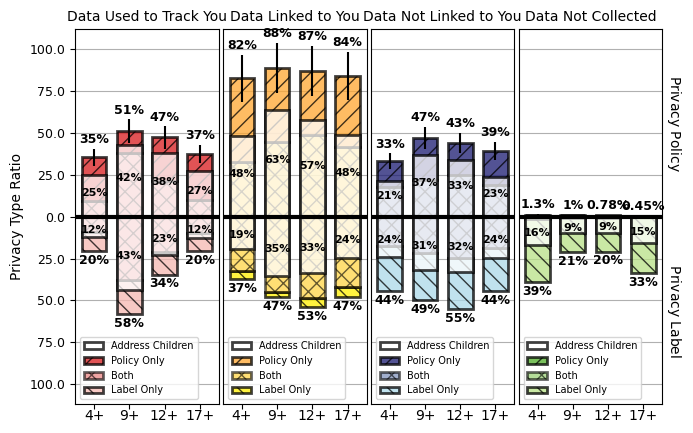

In [ ]:
plot_content_rating_and_children()